# Traces of Classical Music in different Genres

## Team Members

- Gülnur Üstüntepe 090180348
- Elsa Schönwiese 912110043
- Irmak Köseoğlu 090190305

## Introduction
The aim of this project is to find the music genre, which is most similar to classical music by comparing and visualizing different properties of the 10 following genres:
- blues
- classical
- country
- disco
- hiphop
- jazz
- metal
- pop
- reggae
- rock

We used several visualizing and plotting techniques in order to find the genres with the most similar values to the ones from classical music. After narrowing down our choice and reducing the input to 3 or 4 genres in order to have a more detailed image, we concluded that the most similar genre is Jazz.

## Process
Our first meetings were taking place online via zoom in order to agree on a topic and the process and timeline of the project. After submitting our Final Project Proposal, we separately did some more detailed research about different methods to compare and visualize the data. After our first phase of research we quickly realized that the librosa library was not suitable for our purpose, although we mentioned it in the Final Project Proposal. Subsequently, we got together from time to time and created the codes for the projects by trying out our newly found methods and determine the problems. After each meeting we tried to separately find solutions to those problems and work on them together at the next meeting.

Unlike as we wrote in the Final Project Proposal, we decided to just use the GTZAN dataset, since it fit exactly our purpose and it is easier to work with uniform datasets.

Collaboration was really positive and balanced.

In [19]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
from xmltodict import parse
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('features_30_sec.csv')
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


Getting some basic information about the dataset:

**Data size**

In [8]:
data.size

60000

**Data Shape**

In [9]:
data.shape

(1000, 60)

**Data Columns**

In [10]:
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

**Data dtypes**

In [11]:
data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

*Is there any duplicate record in this dataset? If yes,then we remove the duplicate records.*

In [13]:
data[data.duplicated()]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label


*Is there any Null Value in any column?*

In [14]:
data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

Splitting genres

In [17]:
blues=data.head(100)
classical=data[100:200]
country=data[200:300]
disco=data[300:400]
hiphop=data[400:500]
jazz=data[500:600]
metal=data[600:700]
pop=data[700:800]
reggae=data[800:900]
rock=data[900:1000]

 Principal Components Analysis (PCA) is an unsupervised dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space

 PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.
 
 PCA is really sensitive on the variance of the variables: necessary to standardize/normalize the range of the initial variables
Have to find covariances & relations between the variables and filter redundant information (information that is included many times): Covariance Matrix
Determine the Principal Components (PC): find the Eigenvectors and Eigenvalues of this Covariance Matrix

**Why we are using PCA?**

There are a lot of variables and there is multi-colinearity exists between the these variables(features)

**Here, first we took all of the columns and compare them by labels with PCA method**

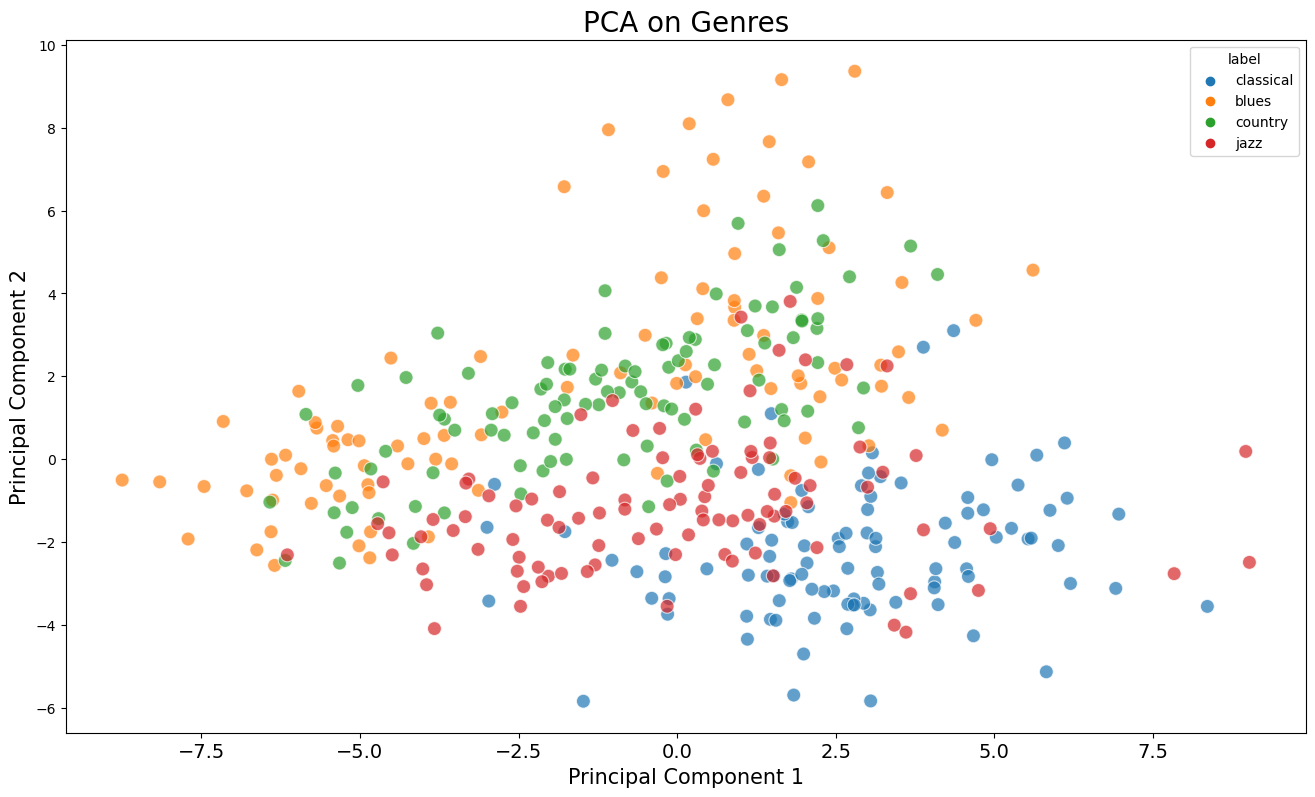

In [21]:
data = data.iloc[0:, 1:]
y = data['label'] #we seperate the genres as labels 
X = data.loc[:, data.columns != 'label'] # this is features of the genres without the name of them

# normalize
cols = X.columns 
scaler = StandardScaler() #this method transforms the values between 0- 1.
np_scaled = scaler.fit_transform(X) #this method finds the features' means and variences.
X = pd.DataFrame(np_scaled, columns = cols) #create a new dataframe with the values between 0-1.

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #linear regression 
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

**Then, after analysing the first PCA graph we can see that blues, country and jazz are the closest genres to classical music, therefore we will have another PCA which compares the 4 of them.**

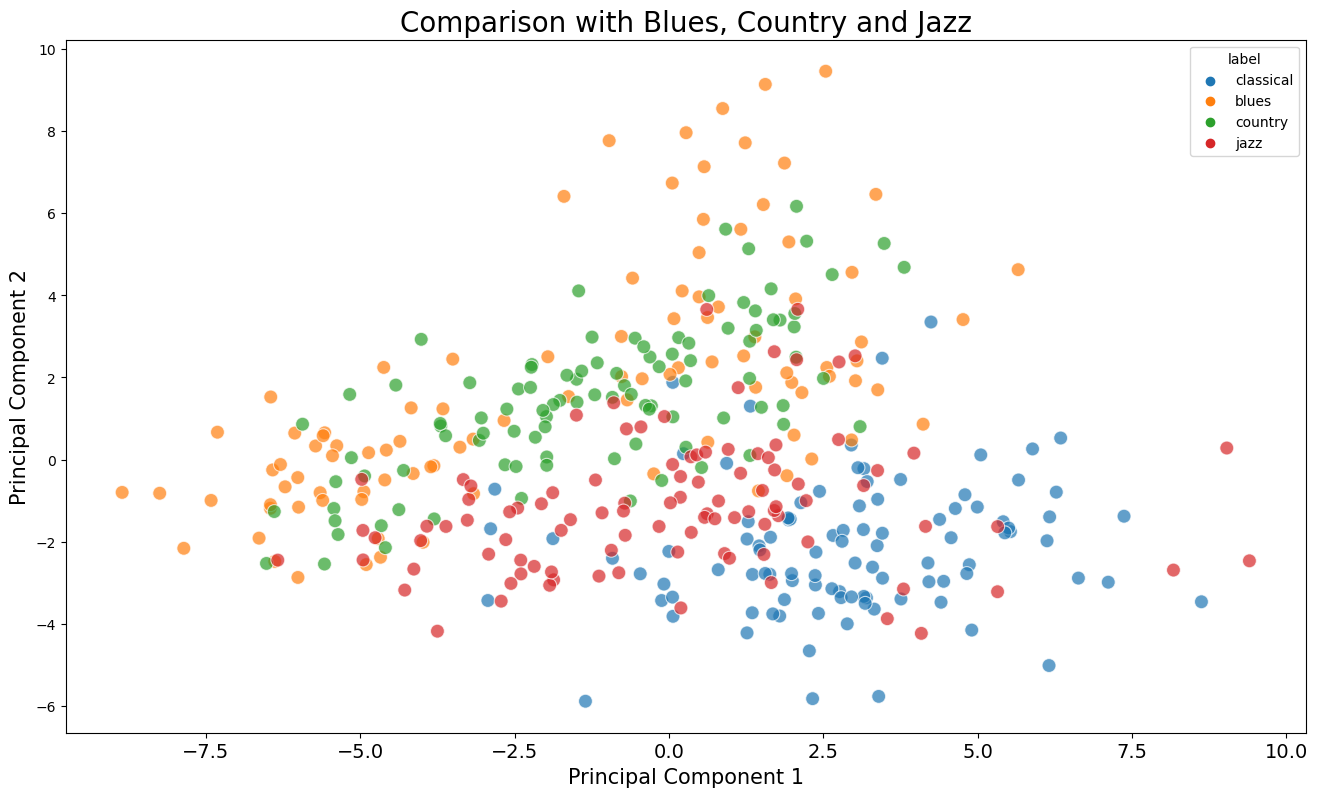

In [22]:
datamerged=pd.concat([classical,blues,country,jazz],ignore_index=True)
data = datamerged.iloc[0:, 1:] 
y = data['label'] #we seperate the genres as labels 
X = data.loc[:, data.columns != 'label'] # this is features of the genres without the name of them

# normalize
cols = X.columns 
scaler = StandardScaler() #this method transforms the values between 0- 1.
np_scaled = scaler.fit_transform(X) #this method finds the features' means and variences.
X = pd.DataFrame(np_scaled, columns = cols) #create a new dataframe with the values between 0-1.

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #linear regression 
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))

sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('Comparison with Blues, Country and Jazz', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

**Now, we can see better blues is far away then others so we take it out and have another PCA graph just with country and jazz, to see which one is the closest...**

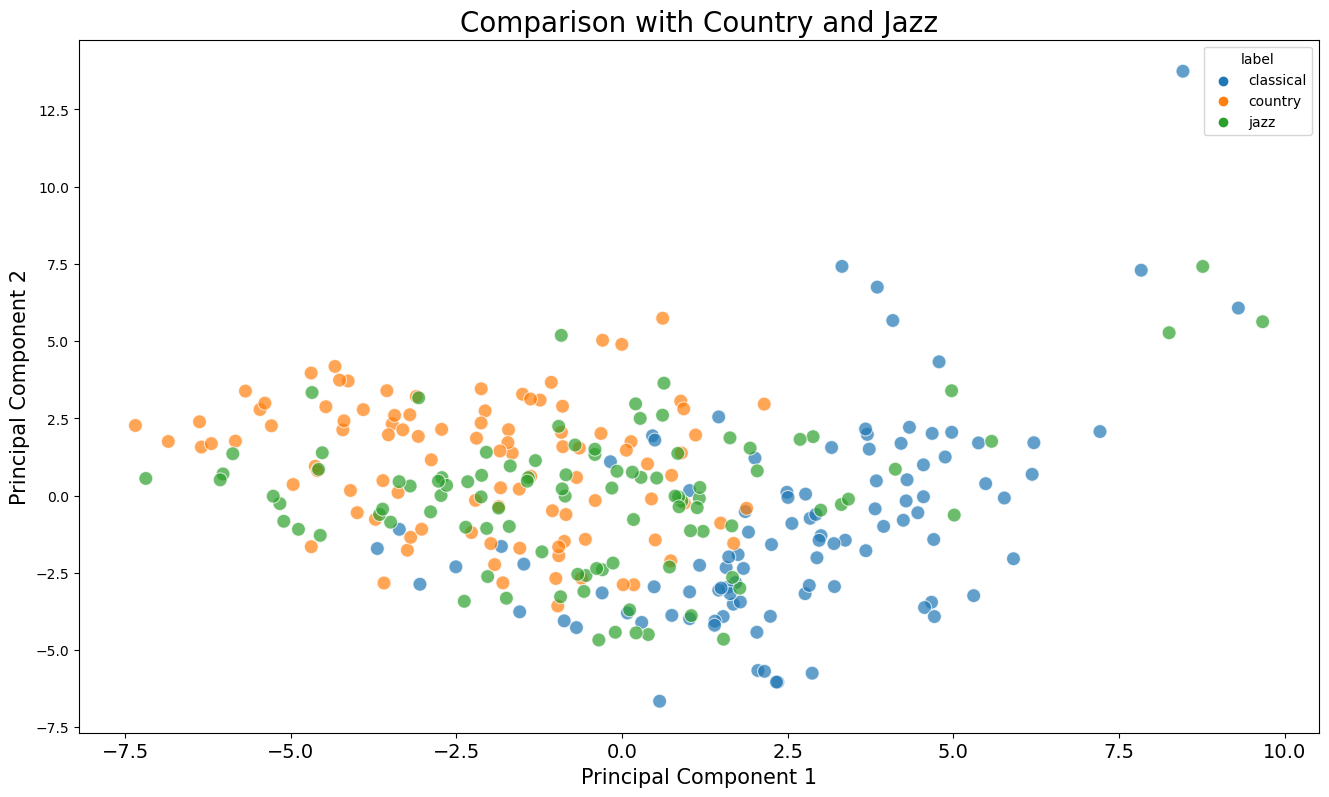

In [23]:
datamerged=pd.concat([classical,country,jazz],ignore_index=True)
data = datamerged.iloc[0:, 1:]
y = data['label'] #we seperate the genres as labels 
X = data.loc[:, data.columns != 'label'] # this is features of the genres without the name of them

# normalize
cols = X.columns 
scaler = StandardScaler() #this method transforms the values between 0- 1.
np_scaled = scaler.fit_transform(X) #this method finds the features' means and variences.
X = pd.DataFrame(np_scaled, columns = cols) #create a new dataframe with the values between 0-1.

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #linear regression 
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))

sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('Comparison with Country and Jazz', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

**Finally, just from the PCA graph we decided jazz is closer to classical music, but now we will proceed with comparing labels by important columns.**

A scatter matrix consists of several pair-wise scatter plots of variables presented in a matrix format. It can be used to determine whether the variables are correlated and whether the correlation is positive or negative.


Now, we have subplots for specific columns that shows whichever labels we want to compare, manually ... (we add *renderer="svg"* inside of fig.show in order to see the output in github)

In [29]:
import plotly.io as pio

pio.renderers

import plotly.io as pio

In [32]:
fig = px.scatter_matrix(data,
    dimensions=["chroma_stft_mean", "rms_mean", "spectral_centroid_mean", "spectral_bandwidth_mean"],
    color="label", symbol="label",
    title="Scatter matrix of genres",
    labels={col:col.replace('_', ' ') for col in data.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
svg_renderer = pio.renderers["svg"]
print(svg_renderer)

SvgRenderer(width=None, height=None, scale=None, engine='auto')

    Renderer to display figures as static SVG images.  This renderer requires
    either the kaleido package or the orca command-line utility and is broadly
    compatible across IPython environments (classic Jupyter Notebook, JupyterLab,
    QtConsole, VSCode, PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/svg+xml'
    


Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

It is also useful in comparing the distribution of data across data sets by drawing boxplots or scatter for each of them.

***First, we will compare "chroma_stft_mean" column.***

In [33]:
fig = px.box(data, x="label", y="chroma_stft_mean")
svg_renderer = pio.renderers["svg"]
print(svg_renderer)

SvgRenderer(width=None, height=None, scale=None, engine='auto')

    Renderer to display figures as static SVG images.  This renderer requires
    either the kaleido package or the orca command-line utility and is broadly
    compatible across IPython environments (classic Jupyter Notebook, JupyterLab,
    QtConsole, VSCode, PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/svg+xml'
    


***Then, we will compare "rms_mean" column.***

In [34]:
fig = px.scatter(data, x="label", y="rms_mean")
svg_renderer = pio.renderers["svg"]
print(svg_renderer)

SvgRenderer(width=None, height=None, scale=None, engine='auto')

    Renderer to display figures as static SVG images.  This renderer requires
    either the kaleido package or the orca command-line utility and is broadly
    compatible across IPython environments (classic Jupyter Notebook, JupyterLab,
    QtConsole, VSCode, PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/svg+xml'
    


***Then, we will compare 'spectral_centroid_mean' column.***

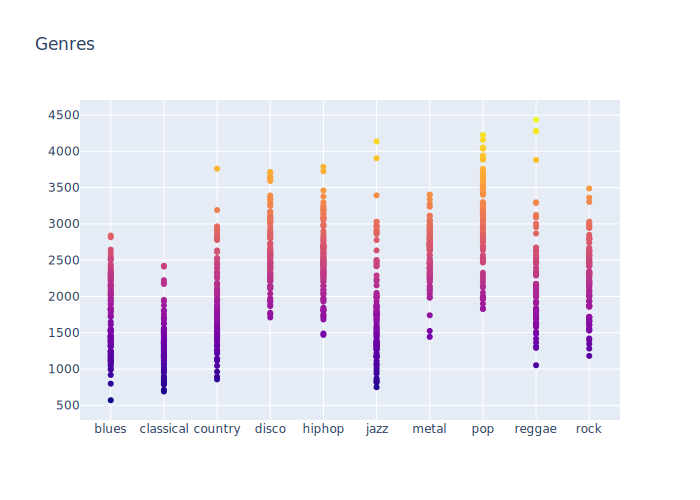

In [33]:
fig = go.Figure(data=go.Scatter(x=data['label'],
                                y=data['spectral_centroid_mean'],
                                mode='markers',
                                marker_color=data['spectral_centroid_mean'],
                                text=data['spectral_centroid_mean'])) # hover text goes here

fig.update_layout(title='Genres')
svg_renderer = pio.renderers["svg"]
print(svg_renderer)

***Then, we will compare '"spectral_bandwidth_mean" column.***

In [37]:
fig = px.scatter(data, x="spectral_bandwidth_mean",  y="label")
fig.update_yaxes(matches=None)
fig.show(renderer="svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [36]:
pip install -U kaleido


Note: you may need to restart the kernel to use updated packages.


**After having graphs for spesific columns, we will have a graph just for the closest ones 'country,jazz,blues' and their 4 important features.**

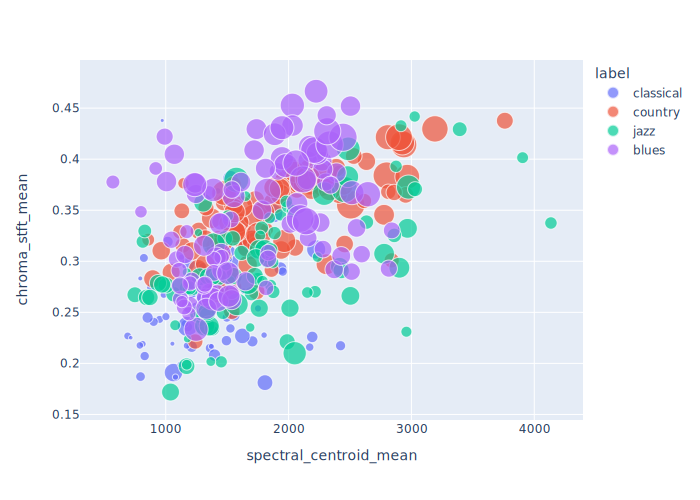

In [36]:
datamerged=pd.concat([classical,country,jazz,blues],ignore_index=True)
data=datamerged.iloc[0:, 1:]
fig=px.scatter(data,x='spectral_centroid_mean', y='chroma_stft_mean', color='label', size='rms_mean')
fig.show(renderer="svg")

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group’s density curve can be compared to see where groups are similar or different.

*So, we have a graph also for 1 column and we can choose the labels manually...*

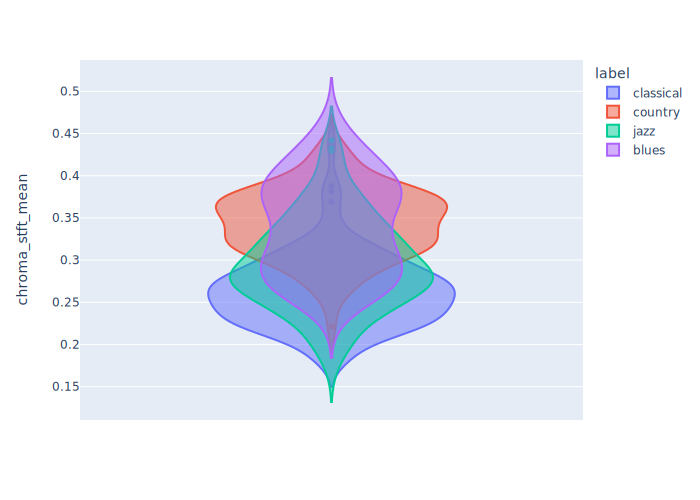

In [37]:
fig = px.violin(data, y="chroma_stft_mean", color="label",
                violinmode='overlay', # draw violins on top of each other
                # default violinmode is 'group' as in example above
                hover_data=data.columns)
fig.show(renderer="svg")

*We used the Facet plot to find a further way to compare the 3/4 closest genres which we determined previously. Again, we used the first four "mean"-columns just as an example. Each graph shows the comparison of values of the genres of each column. By also showing the different genres as "labels" we could therefore combine 3 variables in the graphs. 
In the first 3 graphs it is obvious that jazz is the closest one, whereas in the last graph country appears to be more similar. Therefore, our total finding is again that jazz turns out to be the closest genre.*

In [51]:
def Facet(key):
    
    data = datamerged.iloc[0:, 1:] 
    plot = sns.FacetGrid(data, hue="label")
    plot.map(sns.distplot, key, hist=False).add_legend()

/Users/pinarkoseoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/pinarkoseoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/pinarkoseoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (a

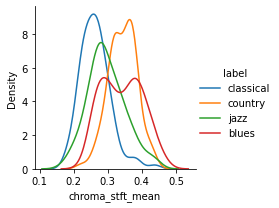

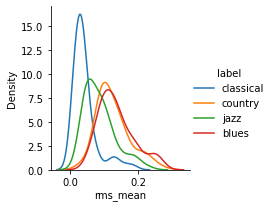

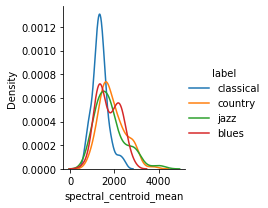

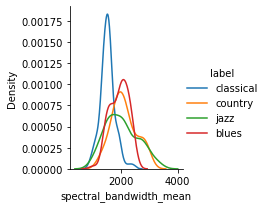

In [52]:
Facet('chroma_stft_mean')
Facet('rms_mean')
Facet('spectral_centroid_mean')
Facet('spectral_bandwidth_mean')

## Conclusion

As expected from the first graphs, Jazz is the genres which shows the most similarities to classical music in various aspects and properties. Other genres that are also very close are especially country music and blues. This emerges from the fact that Jazz and Classical music have influenced each other since their origin. They both show similar structures and historically have been setting greater value on the same kind of musical variety and development than other genres.